## Notebook for making figures in "JAWS" paper

#### Prinster, A., Liu, A., & Saria, S. JAWS: Auditing Predictive Uncertainty Under Covariate Shift. In Advances in Neural Information Processing Systems.

Last updated: January 4, 2023

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from utils.JAWS_utils import *

### Figure 1: Jackknife+ loses coverage on the airfoil dataset under covariate shift

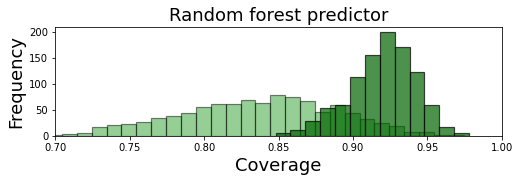

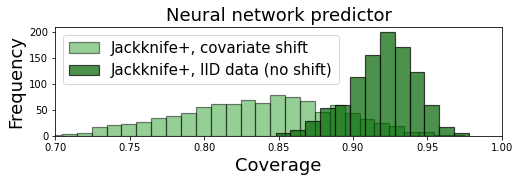

In [3]:
results_nobias = pd.read_csv('./results/JAW_coverage_width/2022-06-01_airfoil_RF_0.0Bias_1000Trials.csv')
results_biased = pd.read_csv('./results/JAW_coverage_width/2022-06-01_airfoil_RF_1.0Bias_1000Trials.csv')

nobias_hist = results_nobias[results_nobias["method"]=="jackknife+"]["coverage"]
biased_hist = results_biased[results_biased["method"]=="jackknife+"]["coverage"]

plt.figure(figsize=(8,2))
w = 0.01
plt.hist(biased_hist, bins=np.arange(min(biased_hist), max(biased_hist) + w, w), alpha=0.5, label="Jackknife+, with covariate shift", edgecolor='black', linewidth=1.2, color = 'C2')
plt.hist(nobias_hist, bins=np.arange(min(nobias_hist), max(nobias_hist) + w, w), alpha=0.7, label="Jackknife+, no covariate shift", edgecolor='black', linewidth=1.2, color = 'darkgreen')

plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Coverage', fontsize = 18)
plt.title('Random forest predictor', fontsize = 18)
# plt.legend(fontsize = 12, loc=[1.1, 1.1], ncol=2, prop={'size': 30})
plt.xlim([0.7, 1])
plt.savefig('./results_figures/fig1_JackknifePlus_LosesCoverage/JAW_Jplus_RF_AirfoilLossCoverage.png',dpi=200,bbox_inches='tight')


nobias_hist = results_nobias[results_nobias["method"]=="jackknife+"]["coverage"]
biased_hist = results_biased[results_biased["method"]=="jackknife+"]["coverage"]

plt.figure(figsize=(8,2))
w = 0.01

plt.hist(biased_hist, bins=np.arange(min(biased_hist), max(biased_hist) + w, w), alpha=0.5, label="Jackknife+, covariate shift", edgecolor='black', linewidth=1.2, color = 'C2')
plt.hist(nobias_hist, bins=np.arange(min(nobias_hist), max(nobias_hist) + w, w), alpha=0.7, label="Jackknife+, IID data (no shift)", edgecolor='black', linewidth=1.2, color = 'darkgreen')

plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Coverage', fontsize = 18)
plt.title('Neural network predictor', fontsize = 18)
plt.legend(fontsize = 18,  prop={'size': 15})
plt.xlim([0.7, 1])
plt.savefig('./results_figures/fig1_JackknifePlus_LosesCoverage/JAW_Jplus_NN_AirfoilLossCoverage.png',dpi=200,bbox_inches='tight')


### Figure 3: Interval generation results for JAW: Coverage and interval width

airfoil
Coverage variance for JAW_oracle :  muh_fun
neural_net       0.000664
random_forest    0.000835
Name: coverage, dtype: float64
Coverage variance for weighted_split_oracle :  muh_fun
neural_net       0.001484
random_forest    0.003100
Name: coverage, dtype: float64


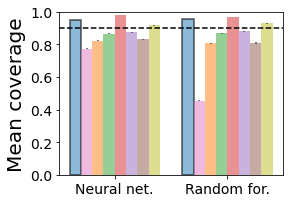

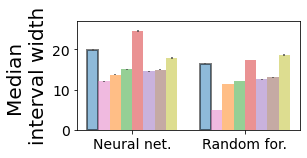

wine
Coverage variance for JAW_oracle :  muh_fun
neural_net       0.003579
random_forest    0.002500
Name: coverage, dtype: float64
Coverage variance for weighted_split_oracle :  muh_fun
neural_net       0.003090
random_forest    0.001793
Name: coverage, dtype: float64


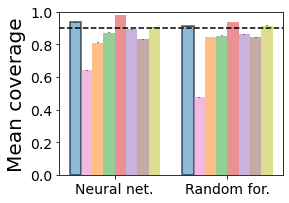

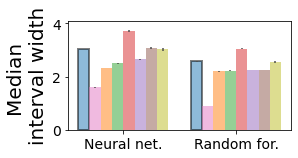

wave
Coverage variance for JAW_oracle :  muh_fun
neural_net       0.000518
random_forest    0.001383
Name: coverage, dtype: float64
Coverage variance for weighted_split_oracle :  muh_fun
neural_net       0.003941
random_forest    0.003100
Name: coverage, dtype: float64


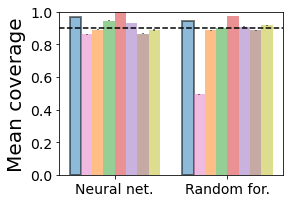

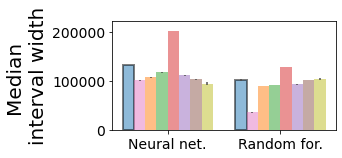

superconduct
Coverage variance for JAW_oracle :  muh_fun
neural_net       0.000481
random_forest    0.000364
Name: coverage, dtype: float64
Coverage variance for weighted_split_oracle :  muh_fun
neural_net       0.002070
random_forest    0.000779
Name: coverage, dtype: float64


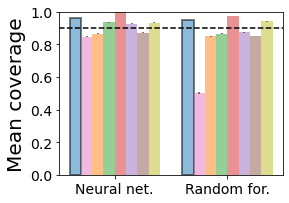

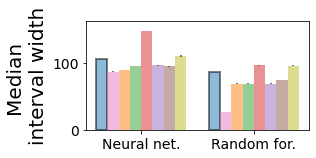

communities
Coverage variance for JAW_oracle :  muh_fun
neural_net       0.002518
random_forest    0.002851
Name: coverage, dtype: float64
Coverage variance for weighted_split_oracle :  muh_fun
neural_net       0.001514
random_forest    0.003849
Name: coverage, dtype: float64


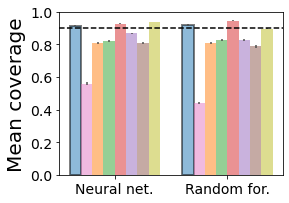

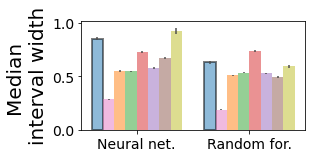

In [4]:
results_air_NN = pd.read_csv('./results/JAW_coverage_width/2023-01-03_airfoil_NN_0.85Bias_10Trials.csv')
results_air_RF = pd.read_csv('./results/JAW_coverage_width/2023-01-03_airfoil_RF_0.85Bias_10Trials.csv')
results_win_NN = pd.read_csv('./results/JAW_coverage_width/2023-01-03_wine_NN_0.53Bias_10Trials.csv')
results_win_RF = pd.read_csv('./results/JAW_coverage_width/2023-01-03_wine_RF_0.53Bias_10Trials.csv')
results_wav_NN = pd.read_csv('./results/JAW_coverage_width/2023-01-03_wave_NN_9.25e-05Bias_10Trials.csv')
results_wav_RF = pd.read_csv('./results/JAW_coverage_width/2023-01-03_wave_RF_9.25e-05Bias_10Trials.csv')
results_sup_NN = pd.read_csv('./results/JAW_coverage_width/2023-01-03_superconduct_NN_0.00062Bias_10Trials.csv')
results_sup_RF = pd.read_csv('./results/JAW_coverage_width/2023-01-03_superconduct_RF_0.00062Bias_10Trials.csv')
results_com_NN = pd.read_csv('./results/JAW_coverage_width/2023-01-03_communities_NN_0.825Bias_10Trials.csv')
results_com_RF = pd.read_csv('./results/JAW_coverage_width/2023-01-03_communities_RF_0.825Bias_10Trials.csv')

results = pd.concat([results_air_NN, 
                     results_air_RF, 
                     results_win_NN, 
                     results_win_RF, 
                     results_wav_NN, 
                     results_wav_RF, 
                     results_sup_NN, 
                     results_sup_RF, results_com_NN, results_com_RF
                    ])

muh_fun_names = ['Neural net.', 'Random for.']

plt.rcParams.update({'font.size': 14})
num_funs=2

datasets = ['airfoil', 'wine', 'wave', 'superconduct', 
            'communities'
           ]
method_names = ['JAW_oracle', 'naive','jackknife','jackknife+','jackknife-mm', 'CV+','split', 'weighted_split_oracle']
ntrial = 200

colors = ['C6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C8']


for dataset in datasets: 
    print(dataset)
    fig, ax = plt.subplots(figsize=(4, 3))
    c_i = 0
    for method in method_names:
        coverage_mean = results[(results['dataset']==dataset)&\
                    (results['method']==method)].groupby('muh_fun')['coverage'].mean()
        coverage_SE = results[(results['dataset']==dataset)&\
                    (results['method']==method)].groupby('muh_fun')['coverage'].std() \
                        /np.sqrt(ntrial)
        if (method in ['JAW_oracle', 'weighted_jackknife+']):
            plt.bar(np.arange(num_funs)+method_names.index(method)*0.1-0.35,\
                    coverage_mean,0.1,alpha=0.5,\
               yerr = coverage_SE,error_kw={'ecolor': '0.3'},label='JAW', edgecolor='black', linewidth=2, color = 'C0')
        else:
            plt.bar(np.arange(num_funs)+method_names.index(method)*0.1-0.35,\
                    coverage_mean,0.1,alpha=0.5,\
               yerr = coverage_SE,error_kw={'ecolor': '0.3'},label=method, color=colors[c_i])
            c_i += 1
        if (method in ['JAW_oracle', 'weighted_split_oracle']):
            print("Coverage variance for " + method + " : ", results[(results['dataset']==dataset)&\
                    (results['method']==method)].groupby('muh_fun')['coverage'].var())
    plt.ylabel('Mean coverage', fontsize = 20)
    plt.ylim([0,1])
    plt.xticks(np.arange(num_funs),muh_fun_names)
    plt.axhline(0.9,linestyle='dashed',color='black')
    plt.savefig('./results_figures/fig3_JAW_Coverage_Width/JAW_retrain_coverage_'+dataset+'.png',dpi=200,bbox_inches='tight')
    plt.show()
    
    c_i = 0
    fig, ax = plt.subplots(figsize=(4, 2))
    max_widths = []
    for method in method_names:
        width_mean = results[(results['dataset']==dataset)&\
            (results['method']==method)].groupby('muh_fun')['width'].median()
        width_SE = results[(results['dataset']==dataset)&\
            (results['method']==method)].groupby('muh_fun')['width'].std() /np.sqrt(ntrial)
        if (method in ['JAW_oracle', 'weighted_jackknife+']):
            plt.bar(np.arange(num_funs)+11*method_names.index(method)*0.1-0.35,\
                    width_mean,0.1,alpha=0.5,\
               yerr = width_SE,error_kw={'ecolor': '0.3'},label='JAW', edgecolor='black', linewidth=2, color = 'C0')            
        else:
            if (method == 'weighted_split_oracle'):
                plt.bar(np.arange(num_funs)+method_names.index(method)*0.1-0.35,\
                        width_mean,0.1,alpha=0.5,\
                   yerr = width_SE,error_kw={'ecolor': '0.3'},label='weighted split', color=colors[c_i])
                c_i += 1
            else:
                plt.bar(np.arange(num_funs)+method_names.index(method)*0.1-0.35,\
                        width_mean,0.1,alpha=0.5,\
                   yerr = width_SE,error_kw={'ecolor': '0.3'},label=method, color=colors[c_i])
                c_i += 1
        max_widths.append(width_mean.max())
        
        plt.ylim([0,1.1*max(max_widths)])
    plt.ylabel('Median \ninterval width', fontsize = 20)
    plt.xticks(np.arange(num_funs), muh_fun_names)
    plt.savefig('./results_figures/fig3_JAW_Coverage_Width/JAW_retrain_width_'+dataset+'.png',dpi=200,bbox_inches='tight')
    plt.show()

### Figure 4: Interval generation results for JAWA: Coverage and interval width

airfoil


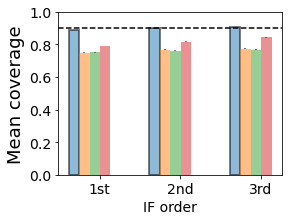

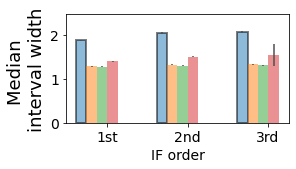

wine


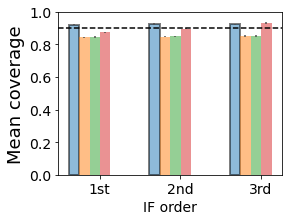

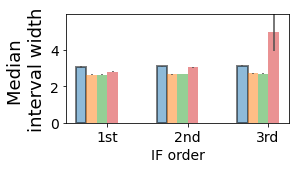

wave


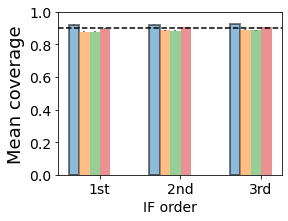

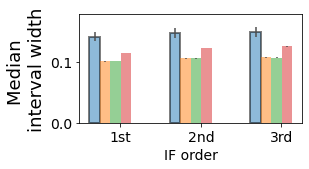

superconduct


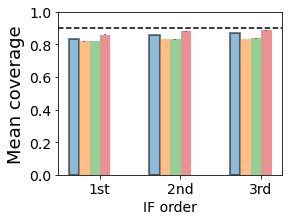

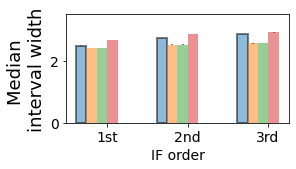

communities


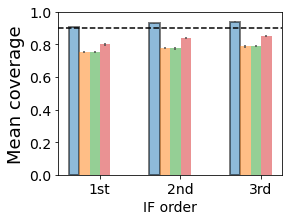

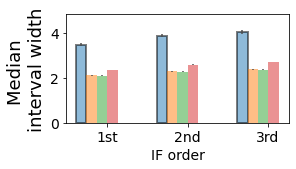

In [5]:
results_air = pd.read_csv('./results/JAWA_coverage_width/2023-01-03_IFs_Experiments_airfoil_10Trials_final.csv')
results_win = pd.read_csv('./results/JAWA_coverage_width/2023-01-03_IFs_Experiments_wine_10Trials_final.csv')
results_wav = pd.read_csv('./results/JAWA_coverage_width/2023-01-03_IFs_Experiments_wave_10Trials_final.csv')
results_sup = pd.read_csv('./results/JAWA_coverage_width/2023-01-03_IFs_Experiments_superconduct_10Trials_final.csv')
results_com = pd.read_csv('./results/JAWA_coverage_width/2023-01-03_IFs_Experiments_communities_10Trials_final.csv')

results = pd.concat([results_air, results_win, results_wav, results_sup, results_com])

results = pd.concat([results_air, results_win, results_wav, results_sup, results_com])
order_method = results['method'].str.split('-', 1, expand=True)
results['order'] = order_method[0]
results['method'] = order_method[1]

plt.rcParams.update({'font.size': 14})
num_orders=3

datasets = ['airfoil', 'wine', 'wave', 'superconduct', 'communities']
method_names = [ 'JAWA','jackknife','jackknife+','jackknife-mm']
ntrial = 200

colors = ['C1', 'C2', 'C3']

order_names = ['1st', '2nd', '3rd']

for dataset in datasets: 
    print(dataset)
    fig, ax = plt.subplots(figsize=(4, 3))
    c_i = 0
    for method in method_names:
        coverage_mean = results[(results['dataset']==dataset)&\
                    (results['method']==method)].groupby('order')['coverage'].mean()
        coverage_SE = results[(results['dataset']==dataset)&\
                    (results['method']==method)].groupby('order')['coverage'].std() \
                        /np.sqrt(ntrial)
        if (method in ['IF1-JAWA', 'IF2-JAWA', 'IF3-JAWA', 'JAWA']):
            plt.bar(np.arange(num_orders)+method_names.index(method)*0.13-0.32,\
                    coverage_mean,0.13,alpha=0.5,\
               yerr = coverage_SE,error_kw={'ecolor': '0.3'},label='JAWA', edgecolor='black', linewidth=2, color = 'C0')
        else:
            plt.bar(np.arange(num_orders)+method_names.index(method)*0.13-0.32,\
                    coverage_mean,0.13,alpha=0.5,\
               yerr = coverage_SE,error_kw={'ecolor': '0.3'},label='IF-' + method, color=colors[c_i])
            c_i += 1
    plt.ylabel('Mean coverage', fontsize = 18)
    plt.ylim([0.0,1])
    plt.xticks(np.arange(num_orders),order_names)
    plt.axhline(0.9,linestyle='dashed',color='black')
    plt.savefig('./results_figures/fig4_JAWA_Coverage_Width/IFs_coverage_'+dataset+'.png',dpi=200,bbox_inches='tight')
    plt.xlabel('IF order')
    plt.show()
    
    width_max = []
    c_i = 0
    fig, ax = plt.subplots(figsize=(4, 2))
    for method in method_names:
        width_mean = results[(results['dataset']==dataset)&\
            (results['method']==method)].groupby('order')['width'].median()
        width_SE = results[(results['dataset']==dataset)&\
            (results['method']==method)].groupby('order')['width'].std() /np.sqrt(ntrial)
        if (method in ['IF1-JAWA', 'IF2-JAWA', 'IF3-JAWA', 'JAWA']):
            plt.bar(np.arange(num_orders)+method_names.index(method)*0.13-0.32,\
                    width_mean,0.13,alpha=0.5,\
               yerr = width_SE,error_kw={'ecolor': '0.3'},label='JAWA', edgecolor='black', linewidth=2, color = 'C0')
        else:
            plt.bar(np.arange(num_orders)+method_names.index(method)*0.13-0.32,\
                width_mean,0.13,alpha=0.5,\
           yerr = width_SE,error_kw={'ecolor': '0.3'},label='IF-' + method, color=colors[c_i])
            c_i += 1
        width_max.append(width_mean.max())
        
    plt.ylim([0,1.2*max(width_max)])
    plt.xticks(np.arange(num_orders),order_names)
    plt.xlabel('IF order')
    plt.ylabel('Median \ninterval width', fontsize = 18)
    plt.savefig('./results_figures/fig4_JAWA_Coverage_Width/IFs_width_'+dataset+'.png',dpi=200,bbox_inches='tight')
    plt.show()

### For code for Figure 5 (Error assessment AUROC values for range of tolerance levels $\tau$), see other notebook titled "20230103_JAWS_ErrorAssessAUC_Figures.ipynb"


airfoil


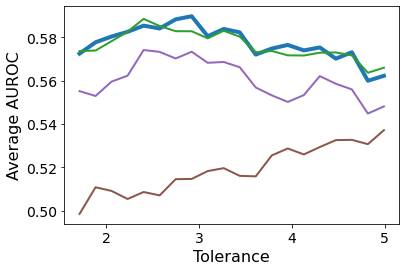

wine


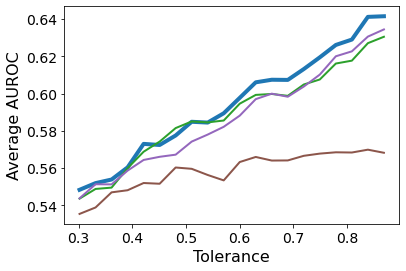

wave


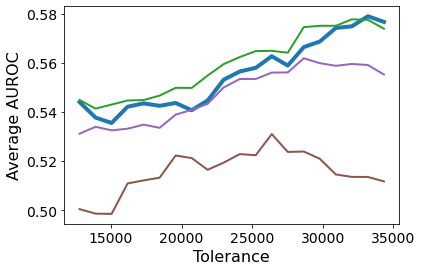

superconduct


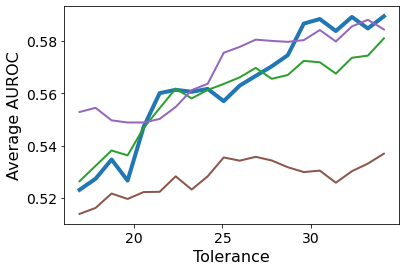

communities


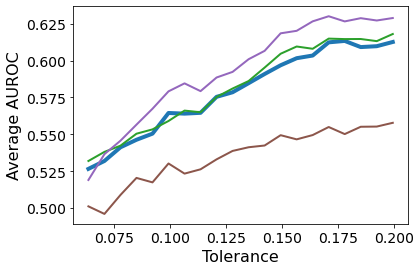

In [6]:
for dataset in ['airfoil', 'wine', 'wave', 'superconduct', 'communities']:
    print(dataset)
    plot_AUC('./results/JAWE_error_assessment/2023-01-04_AUC_' + dataset + '_NN_50Trials.csv', dataset, 'NN', num_trials = 50)


-------------

# Appendix Figures

### Figure 7: Distribution log frequency and log suction features of airfoil dataset before and after exponential tilting

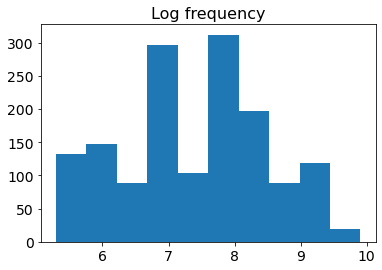

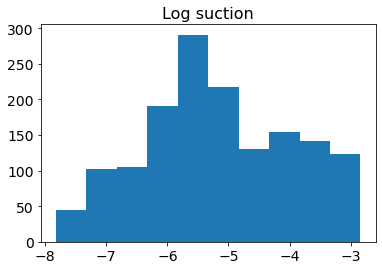

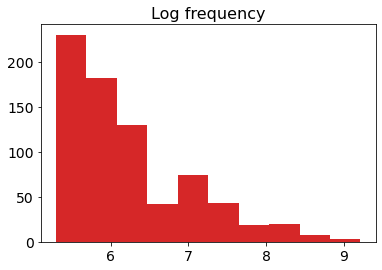

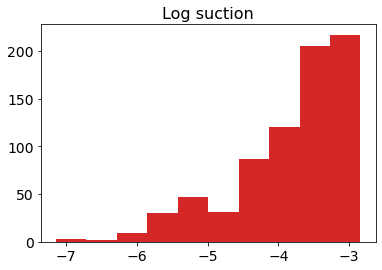

In [7]:
## Read in airfoil data
airfoil = pd.read_csv('./datasets/airfoil/airfoil.txt', sep = '\t', header=None)
airfoil.columns = ["frequency","angle","chord","velocity","suction","sound"]
X_airfoil = airfoil.iloc[:, 0:5].values
X_airfoil[:, 0] = np.log(X_airfoil[:, 0])
X_airfoil[:, 4] = np.log(X_airfoil[:, 4])
Y_airfoil = airfoil.iloc[:, 5].values
n_airfoil = len(Y_airfoil)

## Create biased set of covariates
biased_indices = exponential_tilting_indices(X_airfoil, X_airfoil, 'airfoil', bias=1)
X_airfoil_biased = X_airfoil[biased_indices]

## Plot figures

w=0.1

## Plot covariates without shift
for i in [0, 4]:
    plt.figure(figsize=(6,4))
    plt.hist(X_airfoil[:,i], bins = 10,  color = 'C0')
    plt.title('Log ' + airfoil.columns[i], fontsize = 16)
    plt.show()

## Plot covariates with shift
for i in [0, 4]:
    plt.figure(figsize=(6,4))
    plt.hist(X_airfoil_biased[:,i], bins = 10,  color = 'C3')
    plt.title('Log ' + airfoil.columns[i], fontsize = 16)
    plt.show()

### For code for Figure 8 (Additional error assessment AUROC values for range of tolerance levels $\tau$), see other notebook titled "20230103_JAWS_ErrorAssessAUC_Figures.ipynb"

airfoil


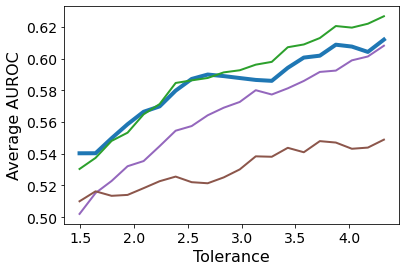

wine


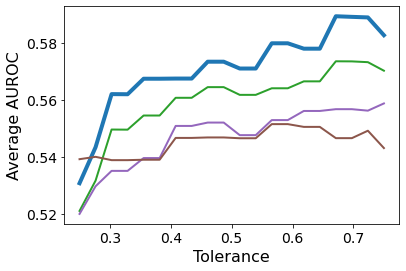

wave


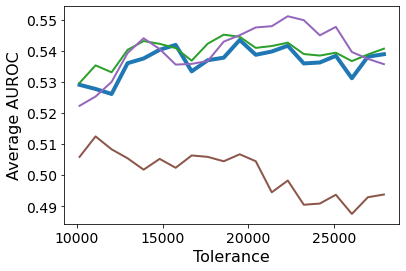

superconduct


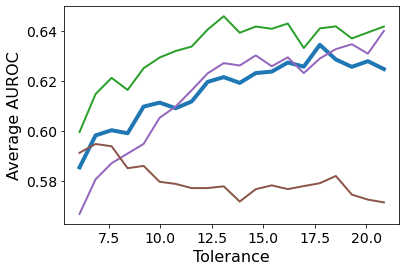

communities


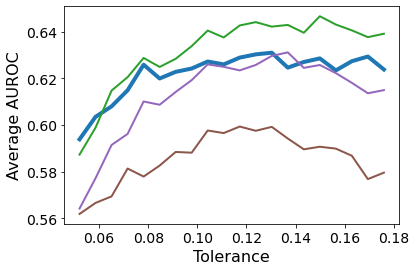

In [8]:
for dataset in ['airfoil', 'wine', 'wave', 'superconduct', 'communities']:
    print(dataset)
    plot_AUC('./results/JAWE_error_assessment/2023-01-04_AUC_' + dataset + '_RF_50Trials.csv', dataset, 'RF', num_trials = 50)


### Figure 9: Comparison of JAW coverage under covariate shift with oracle versus estimated likelihood ratio weights for neural network predictor

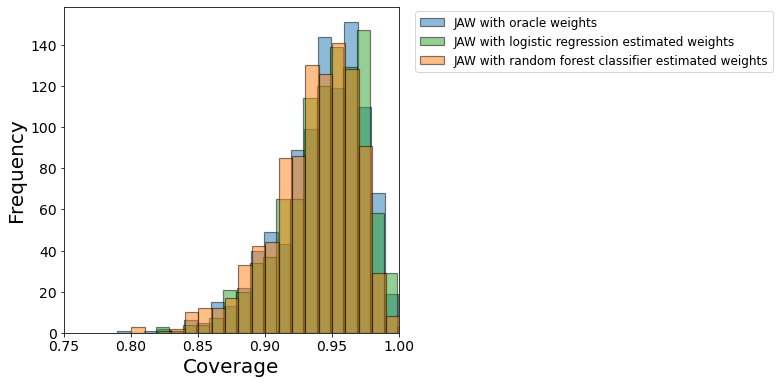

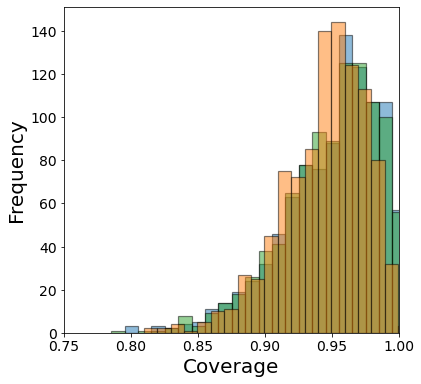

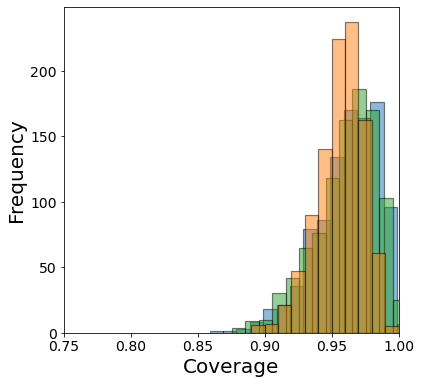

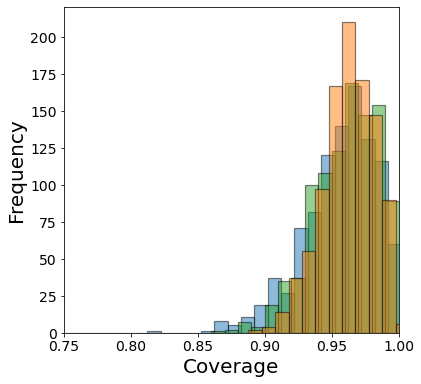

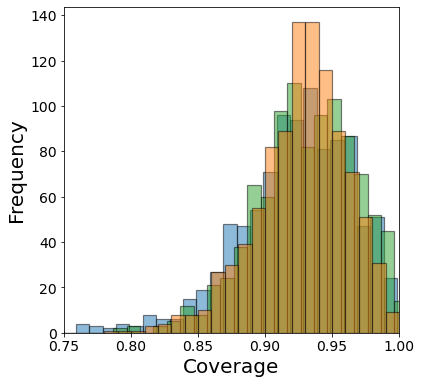

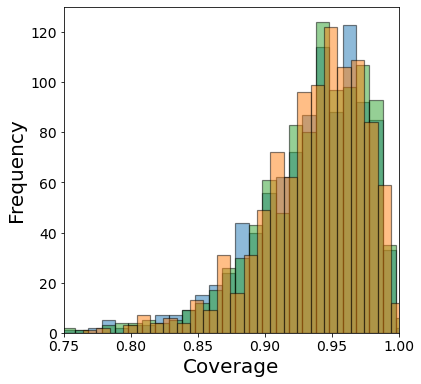

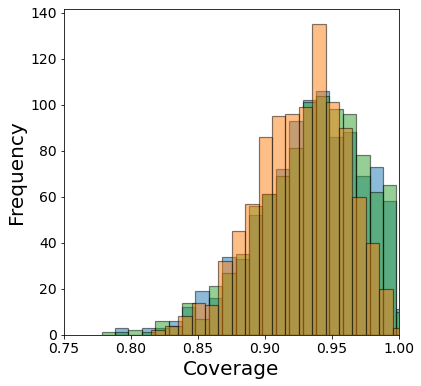

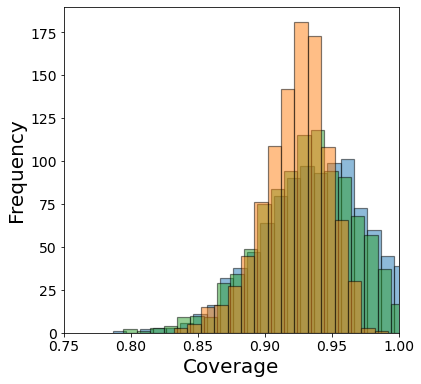

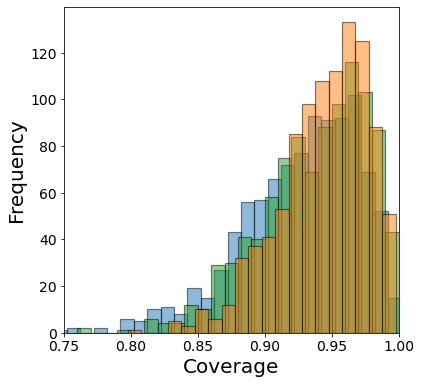

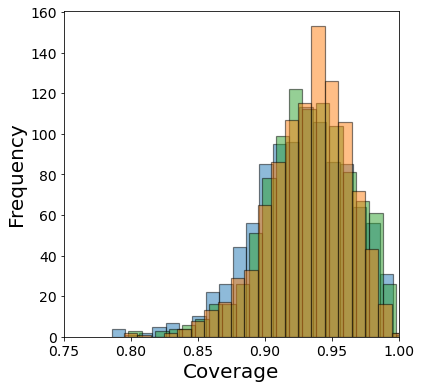

In [9]:
results_air_NN = pd.read_csv('./results/JAW_coverage_width/2022-07-19_airfoil_NN_0.85Bias_1000Trials.csv')

dataset_names = ['airfoil', 'wine', 'wave', 'superconduct', 'communities']
dataset_biases = ['0.85', '0.53', '9.25e-05', '0.00062', '0.825']
mu_funs = ['NN', 'RF']

for mu in mu_funs:
    for i in range(0, 5):

        results = pd.read_csv('./results/JAW_coverage_width/2022-07-19_' + dataset_names[i] + '_' + mu + '_' + dataset_biases[i] + 'Bias_1000Trials.csv')

        ## Neural net mu
        JAW_oracle = results[results_air_NN["method"]=="JAW_oracle"]["coverage"]
        JAW_lr = results[results["method"]=="JAW_lr"]["coverage"]
        JAW_rf = results[results["method"]=="JAW_rf"]["coverage"]

        plt.figure(figsize=(6,6))
        w = 0.01
        plt.hist(JAW_oracle, bins=np.arange(min(JAW_oracle), max(JAW_oracle) + w, w), alpha=0.5, label="JAW with oracle weights", edgecolor='black', linewidth=1.2, color = 'C0')
        plt.hist(JAW_lr, bins=np.arange(min(JAW_lr), max(JAW_lr) + w, w), alpha=0.5, label="JAW with logistic regression estimated weights", edgecolor='black', linewidth=1.2, color = 'C2')
        plt.hist(JAW_rf, bins=np.arange(min(JAW_rf), max(JAW_rf) + w, w), alpha=0.5, label="JAW with random forest classifier estimated weights", edgecolor='black', linewidth=1.2, color = 'C1')
        plt.ylabel('Frequency', fontsize = 20)

        plt.xlabel('Coverage', fontsize = 20)
        # plt.title('Comparison of JAW coverage with oracle versus estimated weights \n(Neural network $\widehat{\mu}$ function, airfoil dataset)', fontsize = 16)
        if (i == 0 and mu == 'NN'):
            plt.legend(loc=[1.05,0.8], fontsize = 12)
        plt.xlim([0.75, 1])
        plt.savefig('./results_figures/fig9_JAW_EstimatedWeights/JAW_WeightEst_comparison_' + dataset_names[i] + '_' + mu + '.png',dpi=200,bbox_inches='tight')
        plt.show()


### Figure 10: Effect of different magnitudes of covariate shift

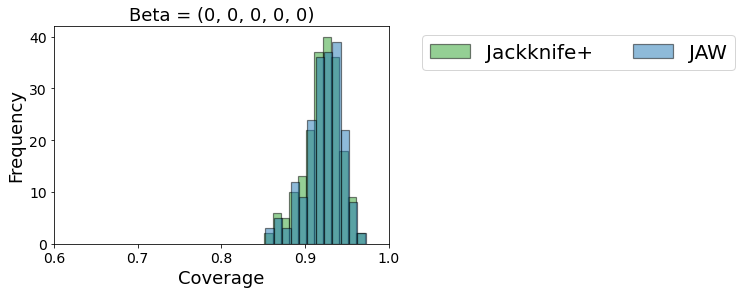

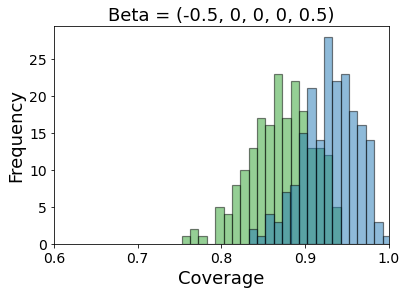

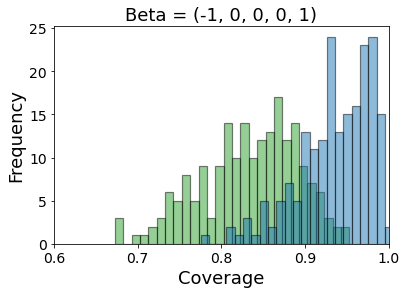

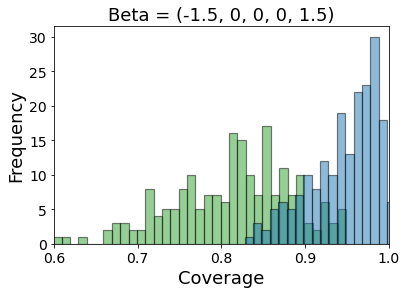

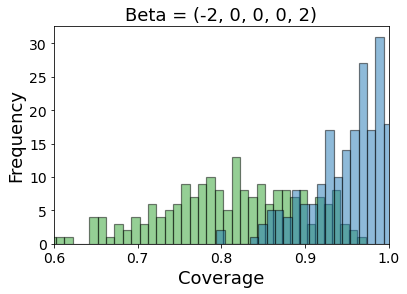

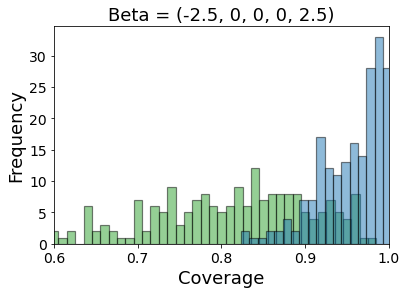

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bias_0_0 = pd.read_csv('./results/JAW_coverage_width/2022-06-01_airfoil_RF_0.0Bias_200Trials.csv')
bias_0_5 = pd.read_csv('./results/JAW_coverage_width/2022-06-01_airfoil_RF_0.5Bias_200Trials.csv')
bias_1_0 = pd.read_csv('./results/JAW_coverage_width/2022-06-01_airfoil_RF_1.0Bias_200Trials.csv')
bias_1_5 = pd.read_csv('./results/JAW_coverage_width/2022-06-01_airfoil_RF_1.5Bias_200Trials.csv')
bias_2_0 = pd.read_csv('./results/JAW_coverage_width/2022-06-01_airfoil_RF_2.0Bias_200Trials.csv')
bias_2_5 = pd.read_csv('./results/JAW_coverage_width/2022-06-01_airfoil_RF_2.5Bias_200Trials.csv')


mu_function = 'random forest'

wbias_0_0_hist = bias_0_0[bias_0_0["muh_fun"]=="random_forest"][bias_0_0["method"]=="JAW"]["coverage"]
wbias_0_5_hist = bias_0_5[bias_0_5["muh_fun"]=="random_forest"][bias_0_5["method"]=="JAW"]["coverage"]
wbias_1_0_hist = bias_1_0[bias_1_0["muh_fun"]=="random_forest"][bias_1_0["method"]=="JAW"]["coverage"]
wbias_1_5_hist = bias_1_5[bias_1_5["muh_fun"]=="random_forest"][bias_1_5["method"]=="JAW"]["coverage"]
wbias_2_0_hist = bias_2_0[bias_2_0["muh_fun"]=="random_forest"][bias_2_0["method"]=="JAW"]["coverage"]
wbias_2_5_hist = bias_2_5[bias_2_5["muh_fun"]=="random_forest"][bias_2_5["method"]=="JAW"]["coverage"]

wbiases = [wbias_0_0_hist, wbias_0_5_hist, wbias_1_0_hist, wbias_1_5_hist, wbias_2_0_hist, wbias_2_5_hist]
wbiases_names = ['wbias_0_0_hist', 'wbias_0_5_hist', 'wbias_1_0_hist', 'wbias_1_5_hist', 'wbias_2_0_hist', 'wbias_2_5_hist']


bias_0_0_hist = bias_0_0[bias_0_0["muh_fun"]=="random_forest"][bias_0_0["method"]=="jackknife+"]["coverage"]
bias_0_5_hist = bias_0_5[bias_0_5["muh_fun"]=="random_forest"][bias_0_5["method"]=="jackknife+"]["coverage"]
bias_1_0_hist = bias_1_0[bias_1_0["muh_fun"]=="random_forest"][bias_1_0["method"]=="jackknife+"]["coverage"]
bias_1_5_hist = bias_1_5[bias_1_5["muh_fun"]=="random_forest"][bias_1_5["method"]=="jackknife+"]["coverage"]
bias_2_0_hist = bias_2_0[bias_2_0["muh_fun"]=="random_forest"][bias_2_0["method"]=="jackknife+"]["coverage"]
bias_2_5_hist = bias_2_5[bias_2_5["muh_fun"]=="random_forest"][bias_2_5["method"]=="jackknife+"]["coverage"]

biases = [bias_0_0_hist, bias_0_5_hist, bias_1_0_hist, bias_1_5_hist, bias_2_0_hist, bias_2_5_hist]
biases_names = ['bias_0_0_hist', 'bias_0_5_hist', 'bias_1_0_hist', 'bias_1_5_hist', 'bias_2_0_hist', 'bias_2_5_hist']

# biases = [bias_0_0_hist, bias_0_5_hist, bias_1_0_hist, bias_2_0_hist]
# biases_names = ['bias_0_0_hist', 'bias_0_5_hist', 'bias_1_0_hist', 'bias_2_0_hist']


bias_levels = [0, 0.5, 1, 1.5, 2, 2.5]


for i in range(0, len(biases)):
    wbias = wbiases[i]
    wbias_name = wbiases_names[i]
    bias = biases[i]
    bias_name = biases_names[i]
    bias_level = bias_levels[i]

    plt.figure(figsize=(6,4))
    w = 0.01
    plt.hist(bias, bins=np.arange(min(bias), max(bias) + w, w), alpha=0.5, label="Jackknife+", edgecolor='black', linewidth=1.2, color = 'C2')
    plt.hist(wbias, bins=np.arange(min(wbias), max(wbias) + w, w), alpha=0.5, label="JAW", edgecolor='black', linewidth=1.2, color = 'C0')
    plt.ylabel('Frequency', fontsize = 18)
    plt.xlabel('Coverage', fontsize = 18)
    if (bias_level != 0):
        plt.title('Beta = (-' + str(bias_level) + ', 0, 0, 0, ' + str(bias_level) + ')', fontsize = 18)
    else:
        plt.title('Beta = (' + str(bias_level) + ', 0, 0, 0, ' + str(bias_level) + ')', fontsize = 18)
        plt.legend(fontsize = 20, ncol=2, loc=[1.1, 0.8])
    plt.xlim([0.6, 1])
    plt.savefig('./results_figures/fig10_JAW_ShiftMagnitudes/JAW_airfoil'+ '_RF_' + str(bias_levels[i]) + 'bias.png',dpi=200,bbox_inches='tight')


### Figure 11: Reduced effective sample size accounts for JAW increase in coverage variance under shift

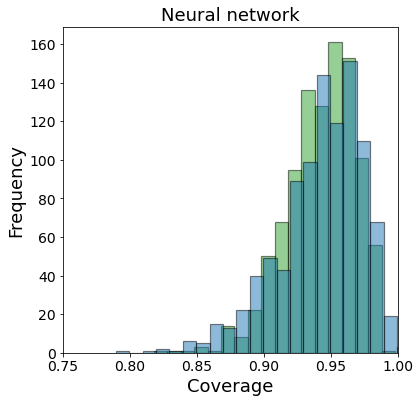

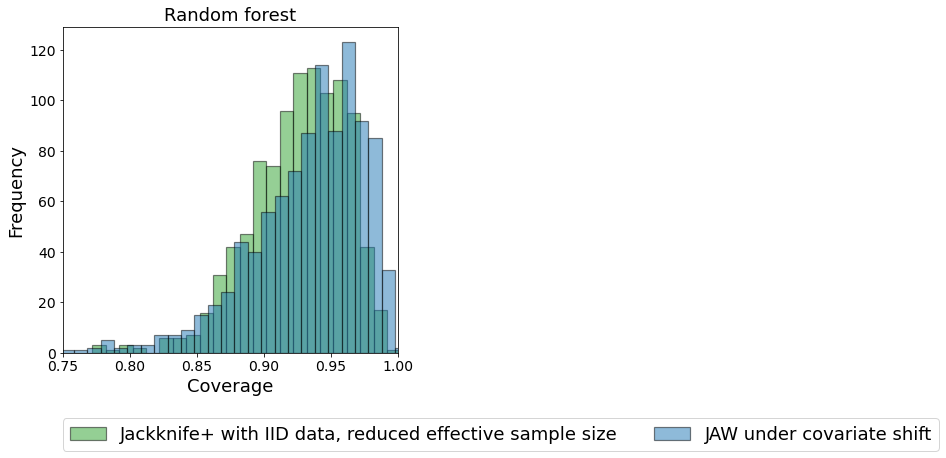

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
eff = pd.read_csv('./results/JAW_coverage_width/2022-07-19_airfoil_NN_0.85Bias_1000Trials_EffectiveSS.csv')
JAW = pd.read_csv('./results/JAW_coverage_width/2022-07-19_airfoil_NN_0.85Bias_1000Trials.csv')

## Neural net mu
# JAW_oracle = results_air_NN[results_air_NN["method"]=="JAW_oracle"]["coverage"]
JAW_lr = eff[eff['method']=='jackknife+']['coverage']
JAW_rf = JAW[JAW['method']=='JAW_oracle']['coverage']

plt.figure(figsize=(6,6))
w = 0.01
# plt.hist(JAW_oracle, bins=np.arange(min(JAW_oracle), max(JAW_oracle) + w, w), alpha=0.5, label="JAW with oracle weights", edgecolor='black', linewidth=1.2, color = 'C0')
plt.hist(JAW_lr, bins=np.arange(min(JAW_lr), max(JAW_lr) + w, w), alpha=0.5, label="Jackknife+, no shift, adjusted effective sample size", edgecolor='black', linewidth=1.2, color = 'C2')
plt.hist(JAW_rf, bins=np.arange(min(JAW_rf), max(JAW_rf) + w, w), alpha=0.5, label="JAW with covariate shift", edgecolor='black', linewidth=1.2, color = 'C0')
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Coverage', fontsize = 18)
plt.title('Neural network', fontsize = 18)
# plt.legend(loc = [1.1, 1.1], fontsize = 12, ncol=2)
plt.xlim([0.75, 1])
plt.savefig('./results_figures/fig11_JAW_EffectiveSS/EffectiveSS_NN.png',dpi=200,bbox_inches='tight')
plt.show()

# results_air_RF = pd.read_csv('./2022-07-15_airfoil_RF_0.85Bias_199TrialsFalseEffectiveSS_AllWeightEst_NEWBIASES_final.csv')
# results_air_RF[results_air_RF['method']=='JAW_oracle'].hist()

import matplotlib.pyplot as plt
eff = pd.read_csv('./results/JAW_coverage_width/2022-07-19_airfoil_RF_0.85Bias_1000Trials_EffectiveSS.csv')
JAW = pd.read_csv('./results/JAW_coverage_width/2022-07-19_airfoil_RF_0.85Bias_1000Trials.csv')

## Neural net mu
# JAW_oracle = results_air_NN[results_air_NN["method"]=="JAW_oracle"]["coverage"]
JAW_lr = eff[eff['method']=='jackknife+']['coverage']
JAW_rf = JAW[JAW['method']=='JAW_oracle']['coverage']

plt.figure(figsize=(6,6))
w = 0.01
# plt.hist(JAW_oracle, bins=np.arange(min(JAW_oracle), max(JAW_oracle) + w, w), alpha=0.5, label="JAW with oracle weights", edgecolor='black', linewidth=1.2, color = 'C0')
plt.hist(JAW_lr, bins=np.arange(min(JAW_lr), max(JAW_lr) + w, w), alpha=0.5, label="Jackknife+ with IID data, reduced effective sample size", edgecolor='black', linewidth=1.2, color = 'C2')
plt.hist(JAW_rf, bins=np.arange(min(JAW_rf), max(JAW_rf) + w, w), alpha=0.5, label="JAW under covariate shift", edgecolor='black', linewidth=1.2, color = 'C0')
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Coverage', fontsize = 18)
plt.title('Random forest', fontsize = 18)
plt.legend(loc = [0, -0.3], fontsize = 12, ncol=2, prop={'size': 18})
plt.savefig('./results_figures/fig11_JAW_EffectiveSS/EffectiveSS_RF.png',dpi=200,bbox_inches='tight')
plt.xlim([0.75, 1])
plt.show()

# results_air_RF = pd.read_csv('./2022-07-15_airfoil_RF_0.85Bias_199TrialsFalseEffectiveSS_AllWeightEst_NEWBIASES_final.csv')
# results_air_RF[results_air_RF['method']=='JAW_oracle'].hist()

### Figure 12: Figures for L2 regularization grid search for JAWA influence function experiments

airfoil


,method,L2_lambda,itrial,coverage,width
0,IF1-jackknife+,0.5,4.5,0.8665,1.167920
1,IF1-jackknife+,1.0,4.5,0.8780,1.234460
2,IF1-jackknife+,2.0,4.5,0.9040,1.376565
3,IF1-jackknife+,4.0,4.5,0.9175,1.614974
4,IF1-jackknife+,8.0,4.5,0.9220,1.854372
5,IF1-jackknife+,16.0,4.5,0.9175,2.049667
6,IF1-jackknife+,32.0,4.5,0.9190,2.297047
7,IF1-jackknife+,64.0,4.5,0.9250,2.634291
8,IF1-jackknife+,96.0,4.5,0.9170,2.892760
9,IF1-jackknife+,128.0,4.5,0.9105,3.202065


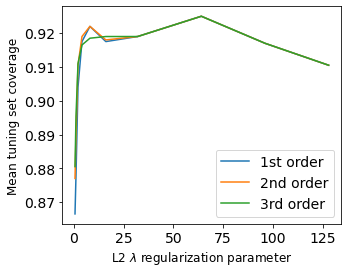

wine


,method,L2_lambda,itrial,coverage,width
0,IF1-jackknife+,0.5,4.5,0.6360,1.661219
1,IF1-jackknife+,1.0,4.5,0.6755,1.781114
2,IF1-jackknife+,2.0,4.5,0.7530,1.964367
3,IF1-jackknife+,4.0,4.5,0.8485,2.325803
4,IF1-jackknife+,8.0,4.5,0.8970,2.627324
5,IF1-jackknife+,16.0,4.5,0.8985,2.664315
6,IF1-jackknife+,32.0,4.5,0.8940,2.659250
7,IF1-jackknife+,64.0,4.5,0.8930,2.832692
8,IF1-jackknife+,96.0,4.5,0.8940,3.150801
9,IF1-jackknife+,128.0,4.5,0.8985,3.382456


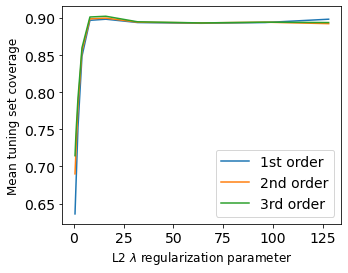

wave


,method,L2_lambda,itrial,coverage,width
0,IF1-jackknife+,0.5,4.5,0.2650,0.082986
1,IF1-jackknife+,1.0,4.5,0.4970,0.083943
2,IF1-jackknife+,2.0,4.5,0.8385,0.081418
3,IF1-jackknife+,4.0,4.5,0.9150,0.102703
4,IF1-jackknife+,8.0,4.5,0.9305,0.178903
5,IF1-jackknife+,16.0,4.5,0.9365,0.340495
6,IF1-jackknife+,32.0,4.5,0.9395,0.661221
7,IF1-jackknife+,64.0,4.5,0.9390,1.267906
8,IF1-jackknife+,96.0,4.5,0.9325,1.822546
9,IF1-jackknife+,128.0,4.5,0.9280,2.330340


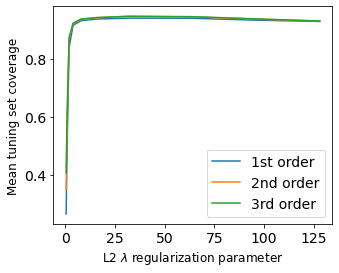

superconduct


,method,L2_lambda,itrial,coverage,width
0,IF1-jackknife+,0.5,4.5,0.4620,0.680806
1,IF1-jackknife+,1.0,4.5,0.4925,0.751726
2,IF1-jackknife+,2.0,4.5,0.5590,0.877937
3,IF1-jackknife+,4.0,4.5,0.6570,1.117495
4,IF1-jackknife+,8.0,4.5,0.7365,1.395417
5,IF1-jackknife+,16.0,4.5,0.7840,1.690340
6,IF1-jackknife+,32.0,4.5,0.8050,1.839884
7,IF1-jackknife+,64.0,4.5,0.8530,2.076814
8,IF1-jackknife+,96.0,4.5,0.8940,2.393394
9,IF1-jackknife+,128.0,4.5,0.9155,2.727422


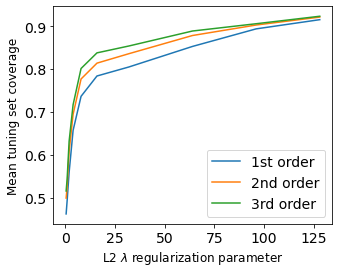

communities


,method,L2_lambda,itrial,coverage,width
0,IF1-jackknife+,0.5,4.5,0.0650,0.114039
1,IF1-jackknife+,1.0,4.5,0.1415,0.231399
2,IF1-jackknife+,2.0,4.5,0.2445,0.426942
3,IF1-jackknife+,4.0,4.5,0.4185,0.727203
4,IF1-jackknife+,8.0,4.5,0.6355,1.205985
5,IF1-jackknife+,16.0,4.5,0.7895,1.736859
6,IF1-jackknife+,32.0,4.5,0.8365,1.955300
7,IF1-jackknife+,64.0,4.5,0.8790,2.095084
8,IF1-jackknife+,96.0,4.5,0.9150,2.378994
9,IF1-jackknife+,128.0,4.5,0.9250,2.609158


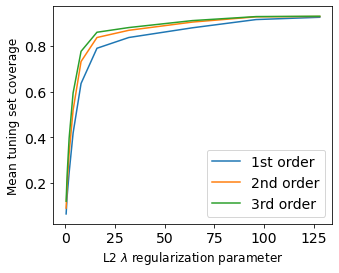

In [12]:
for dataset in ['airfoil', 'wine', 'wave', 'superconduct', 'communities']:
    print(dataset)
    
    grid_search = pd.read_csv('./IF_intermediate_files/2022-07-16_IFs_L2GridSearch_' + dataset + '_10Trials.csv')

    grid_search = grid_search[grid_search['method'].isin(['IF1-jackknife+', 'IF2-jackknife+', 'IF3-jackknife+'])]
    grid_search = grid_search.groupby(['method', 'L2_lambda'], as_index=False).mean()
    grid_search_IF1 = grid_search[grid_search['method']=='IF1-jackknife+']
    grid_search_IF2 = grid_search[grid_search['method']=='IF2-jackknife+']
    grid_search_IF3 = grid_search[grid_search['method']=='IF3-jackknife+']
    display(grid_search_IF1)

    plt.figure(figsize=(5,4))
    plt.plot(grid_search_IF1['L2_lambda'], grid_search_IF1['coverage'], label = '1st order')
    plt.plot(grid_search_IF2['L2_lambda'], grid_search_IF2['coverage'], label = '2nd order')
    plt.plot(grid_search_IF3['L2_lambda'], grid_search_IF3['coverage'], label = '3rd order')
    # plt.title('Jackknife+ coverage (no covariate shift) \n versus L2 regularization parameter', size =12)
    plt.xlabel('L2 $\lambda$ regularization parameter', size = 12)
    plt.ylabel('Mean tuning set coverage', size = 12)
    plt.legend()
    plt.savefig('./results_figures/fig12_JAWA_GridSearch/GridSearchFig_' + dataset + '.png')
    plt.show()


L2 lambda values selected from grid search at threshold of 0.875 average coverage

| Dataset      | Selected L2 lambda value |
|--------------|--------------------------|
| Airfoil      | 1.0                      |
| Wine         | 8.0                      |
| Wave         | 4.0                      |
| Superconduct | 96.0                     |
| Communities  | 64.0                     |

### Figure 13: Histogram comparison of jackknife+ and JAW coverage under covariate shift


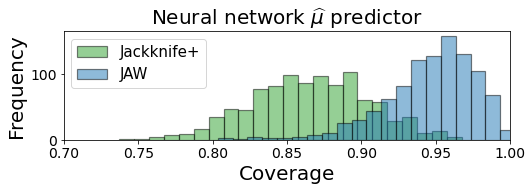

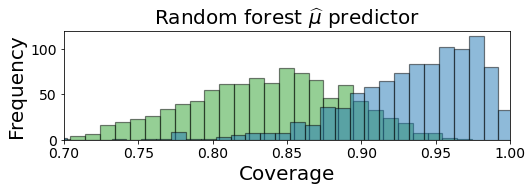

In [13]:
results_air_NN = pd.read_csv('./results/JAW_coverage_width/2022-06-01_airfoil_NN_1.0Bias_1000Trials.csv')
results_air_RF = pd.read_csv('./results/JAW_coverage_width/2022-06-01_airfoil_RF_1.0Bias_1000Trials.csv')

## Neural net mu
jackknife_plus_hist = results_air_NN[results_air_NN["method"]=="jackknife+"]["coverage"]
JAW_hist = results_air_NN[results_air_NN["method"]=="JAW"]["coverage"]

plt.figure(figsize=(8,2))
w = 0.01
plt.hist(jackknife_plus_hist, bins=np.arange(min(jackknife_plus_hist), max(jackknife_plus_hist) + w, w), alpha=0.5, label="Jackknife+", edgecolor='black', linewidth=1.2, color = 'C2')
plt.hist(JAW_hist, bins=np.arange(min(JAW_hist), max(JAW_hist) + w, w), alpha=0.5, label="JAW", edgecolor='black', linewidth=1.2, color = 'C0')
plt.ylabel('Frequency', fontsize = 20)
plt.xlabel('Coverage', fontsize = 20)
plt.title('Neural network $\widehat{\mu}$ predictor', fontsize = 20)
plt.legend(fontsize = 12, prop={'size': 15})
plt.xlim([0.7, 1])
plt.savefig('./results_figures/fig13_JAW_Histograms/JAW_airfoil_NN_comparison.png',dpi=200,bbox_inches='tight')


## Neural net mu
jackknife_plus_hist = results_air_RF[results_air_RF["method"]=="jackknife+"]["coverage"]
JAW_hist = results_air_RF[results_air_RF["method"]=="JAW"]["coverage"]

plt.figure(figsize=(8,2))
w = 0.01
plt.hist(jackknife_plus_hist, bins=np.arange(min(jackknife_plus_hist), max(jackknife_plus_hist) + w, w), alpha=0.5, label="Jackknife+ bias", edgecolor='black', linewidth=1.2, color = 'C2')
plt.hist(JAW_hist, bins=np.arange(min(JAW_hist), max(JAW_hist) + w, w), alpha=0.5, label="JAW", edgecolor='black', linewidth=1.2, color = 'C0')
plt.ylabel('Frequency', fontsize = 20)
plt.xlabel('Coverage', fontsize = 20)
plt.title('Random forest $\widehat{\mu}$ predictor', fontsize = 20)
# plt.legend(fontsize = 12, loc=[1.1, 1.1], ncol=2, prop={'size': 15})
plt.xlim([0.7, 1])
plt.savefig('./results_figures/fig13_JAW_Histograms/JAW_airfoil_RF_comparison.png',dpi=200,bbox_inches='tight')

